In [4]:
import dependencias

In [14]:
agent = dependencias.Agentes.ChaserAgent()
game = dependencias.Snake_game((15, 15), 5, agent)
game.evaluar()

100%|██████████| 100/100 [00:00<00:00, 1305.73it/s]


{'puntuacion_media': np.float64(8.07),
 'puntuacion_maxima': np.int64(25),
 'puntuacion_minima': np.int64(3),
 'movimientos_medios': np.float64(37.36),
 'movimientos_maximos': np.int64(122),
 'movimientos_minimos': np.int64(9),
 'movimientos por puntuacion': np.float64(4.629491945477075)}

In [7]:
agent = dependencias.Agentes.Avoid_inmediate_death()
game = dependencias.Snake_game((15, 15), 5, agent)
game.play_with_pygame()


In [12]:
agent = dependencias.Agentes.Avoid_inmediate_death()
game = dependencias.Snake_game((15, 15), 5, agent)
game.evaluar()


100%|██████████| 100/100 [00:00<00:00, 486.24it/s]


{'puntuacion_media': np.float64(8.45),
 'puntuacion_maxima': np.int64(16),
 'puntuacion_minima': np.int64(4),
 'movimientos_medios': np.float64(510.44),
 'movimientos_maximos': np.int64(1154),
 'movimientos_minimos': np.int64(163),
 'movimientos por puntuacion': np.float64(60.40710059171598)}

In [13]:
agent_1 = dependencias.Agentes.ChaserAgent()
agente_2 = dependencias.Agentes.Avoid_inmediate_death()

agente_combiando = dependencias.Agentes.Combined_agent(agentes = (agent_1, agente_2), weights= (0.5, 1))

game = dependencias.Snake_game((15, 15), 5, agente_combiando)
game.evaluar()

100%|██████████| 100/100 [00:00<00:00, 211.89it/s]


{'puntuacion_media': np.float64(32.38),
 'puntuacion_maxima': np.int64(63),
 'puntuacion_minima': np.int64(8),
 'movimientos_medios': np.float64(177.65),
 'movimientos_maximos': np.int64(393),
 'movimientos_minimos': np.int64(37),
 'movimientos por puntuacion': np.float64(5.486411365040148)}

In [6]:
agent = dependencias.Agentes.Aantiloop()
game = dependencias.Snake_game((15, 15), 30, agent)
game.play_with_pygame()


In [ ]:
combinado = dependencias.Agentes.Combined_agent(agentes = (agente_avoider, agen), weights= (0.5, 1))

# Agente de Reinforcement Learning con modelo de Deep Q-Networks.
## State: State Matrix

In [1]:
import dependencias
# Parámetros del agente

dqnagent = dependencias.Agentes.DQNAgent(
    gamma=0.99,
    epsilon=1.0,
    epsilon_min=0.1,
    epsilon_decay=0.001,
    learning_rate=0.001,
    input_dim=10*10,  
    n_actions=4,      
    batch_size=64,
    mem_size=10000,
    target_update_freq=100,
    checkpoint_dir='checkpoints'
)
game = dependencias.Snake_game((10, 10), 1, dqnagent)

pygame 2.6.1 (SDL 2.28.4, Python 3.12.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
import matplotlib.pyplot as plt
from IPython import display

def plot(scores, mean_scores):
    display.clear_output(wait=True)
    display.display(plt.gcf())
    plt.clf()
    plt.title('Training...')
    plt.xlabel('Number of games')
    plt.ylabel('Score')
    plt.plot(scores)
    plt.plot(mean_scores)
    plt.ylim(ymin=0)
    plt.text(len(scores)-1, scores[-1], str(scores[-1]))
    plt.text(len(mean_scores)-1, mean_scores[-1], str(mean_scores[-1]))
    
n_games = 0
total_score = 0
plot_scores = []
plot_mean_scores = []


In [3]:
episodes = 10000
save_every = 500
import numpy as np
for e in range(1, episodes+1):
    n_games += 1
    state = game.state
    state_matrix = state.state_matrix_cnn().flatten()
    done = False
    
    while not done:
        # Elegir acción
        action_game = dqnagent.get_action(state)
        action_mem = dqnagent.get_action_mem(action_game)
        
        # Realizar acción
        game.state.update(action_game)
        next_state = game.state
        
        # Recompensa
        if game.state.is_game_over:
            reward = -10
        elif game.state.ate_food == True:
            reward = 10
        else:
            reward = 0
        
        # Guardar transición
        next_state_matrix = next_state.state_matrix_cnn().flatten()
        dqnagent.store_transition(state_matrix, action_mem, reward, next_state_matrix, game.state.is_game_over)
        state_matrix = next_state_matrix
        
        # Entrenar agente
        if len(dqnagent.memory) >= dqnagent.batch_size:
            dqnagent.train()
            
        if game.state.is_game_over:
            # Crear estadísticas para plotearlas.
            score = len(game.state.snake)
            plot_scores.append(score)
            if n_games >= 50:
                mean_score = np.sum(plot_scores[-50:]) / 50
                plot_mean_scores.append(mean_score)
            else:
                total_score += score
                mean_score = total_score / n_games
                plot_mean_scores.append(mean_score)
            
            print(f"Episode: {e}/{episodes}, Score: {score}, Epsilon: {dqnagent.epsilon:.4}")
            
            # Actualizar epsilon para exploración-explotación.
            dqnagent.update_epsilon()
            
            # Save Checkpoint
            if e % save_every == 0:
                dqnagent.save_checkpoint(e, mean_score)
            
            game.state.reset()
            done = True
            
        if e % save_every == 0:
            game.play_with_pygame()
            dqnagent.epsilon = 0.3 # Reset epsilon to encourage exploration during visualization
        

c:\Users\Usuario\Documents\GitHub\practica_3_ALN\dependencias\Agentes\deep_q_agent.py:111: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\utils\tensor_new.cpp:281.)
  states = torch.tensor(states, dtype=torch.float).to(self.q_eval.device)


Episode: 1/10000, Score: 1, Epsilon: 1.0
Episode: 2/10000, Score: 2, Epsilon: 0.999
Episode: 3/10000, Score: 1, Epsilon: 0.998
Episode: 4/10000, Score: 1, Epsilon: 0.997
Episode: 5/10000, Score: 2, Epsilon: 0.996
Episode: 6/10000, Score: 1, Epsilon: 0.995
Episode: 7/10000, Score: 1, Epsilon: 0.994
Episode: 8/10000, Score: 1, Epsilon: 0.993
Episode: 9/10000, Score: 1, Epsilon: 0.992
Episode: 10/10000, Score: 1, Epsilon: 0.991
Episode: 11/10000, Score: 1, Epsilon: 0.99
Episode: 12/10000, Score: 1, Epsilon: 0.989
Episode: 13/10000, Score: 1, Epsilon: 0.988
Episode: 14/10000, Score: 1, Epsilon: 0.987
Episode: 15/10000, Score: 1, Epsilon: 0.986
Episode: 16/10000, Score: 1, Epsilon: 0.985
Episode: 17/10000, Score: 1, Epsilon: 0.984
Episode: 18/10000, Score: 1, Epsilon: 0.983
Episode: 19/10000, Score: 1, Epsilon: 0.982
Episode: 20/10000, Score: 1, Epsilon: 0.981
Episode: 21/10000, Score: 1, Epsilon: 0.98
Episode: 22/10000, Score: 1, Epsilon: 0.979
Episode: 23/10000, Score: 3, Epsilon: 0.978
E

KeyboardInterrupt: 

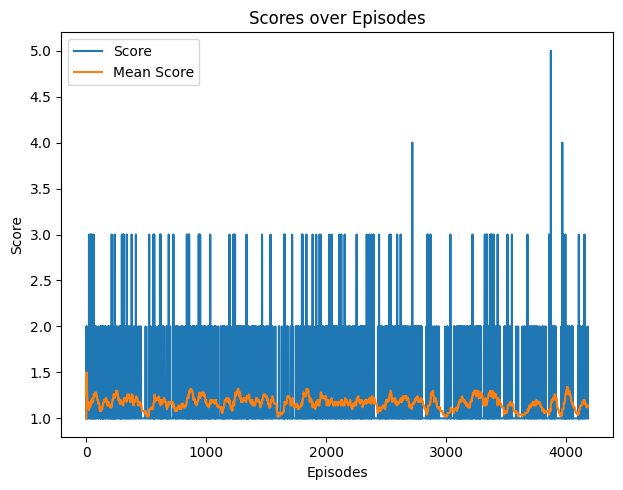

<Figure size 640x480 with 0 Axes>

In [4]:
# Plot Performance Metrics
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title('Scores over Episodes')
plt.plot(plot_scores, label='Score')
plt.plot(plot_mean_scores, label='Mean Score')
plt.xlabel('Episodes')
plt.ylabel('Score')
plt.legend()
plt.tight_layout()
plt.show()
plt.savefig(f'performance_metrics.png')

# Agente de Reinforcement Learning con modelo de Deep Q-Networks combinado con Convolutional Neural-Networks.
## State: State Matrix

In [2]:
import dependencias

dqnagentcnn = dependencias.Agentes.DQNAgentCNN(
    gamma=0.99,
    epsilon=1.0,
    epsilon_min=0.1,
    epsilon_decay=0.001,
    learning_rate=0.001,
    input_channels=4,        # Número de canales: 4 (espacio libre, cuerpo, cabeza, comida)
    grid_size=(10, 10),       # Tamaño de la matriz del estado
    n_actions=4,      
    batch_size=64,
    mem_size=10000,
    target_update_freq=100,
    checkpoint_dir='checkpoints'
)
# Inicializar el juego Snake
game = dependencias.Snake_game((10, 10), 1, dqnagentcnn)

In [3]:
n_games = 0
total_score = 0
plot_scores = []
plot_mean_scores = []

In [7]:
episodes = 10000
save_every = 500
import numpy as np
for e in range(0, episodes+1):
    n_games += 1
    state = game.state
    # No aplanar el estado, mantener la forma (canales, height, width)
    state_matrix = state.state_matrix()
    done = False
    
    while not done:
        # Elegir acción
        action_game = dqnagentcnn.get_action(state)
        action_mem = dqnagentcnn.get_action_mem(action_game)
        
        # Realizar acción
        game.state.update(action_game)
        next_state = game.state
        
        # Recompensa
        if game.state.is_game_over:
            reward = -10
        elif game.state.ate_food == True:
            reward = 10
        else:
            reward = 0
        
        # Guardar transición
        next_state_matrix = next_state.state_matrix()
        dqnagentcnn.store_transition(state_matrix, action_mem, reward, next_state_matrix, game.state.is_game_over)
        state_matrix = next_state_matrix
        
        # Entrenar agente
        loss = None
        if len(dqnagentcnn.memory) >= dqnagentcnn.batch_size:
            loss = dqnagentcnn.train()
            
        if game.state.is_game_over:
            # Crear estadísticas para plotearlas.
            score = len(game.state.snake)
            plot_scores.append(score)
            if n_games >= 50:
                mean_score = np.sum(plot_scores[-50:]) / 50
                plot_mean_scores.append(mean_score)
            else:
                total_score += score
                mean_score = total_score / n_games
                plot_mean_scores.append(mean_score)
            
            print(f"Episode: {e}/{episodes}, Score: {score}, Epsilon: {dqnagentcnn.epsilon:.4f}")
            
            # Actualizar epsilon para exploración-explotación.
            dqnagentcnn.update_epsilon()
            
            # Save Checkpoint
            if e % save_every == 0:
                dqnagentcnn.save_checkpoint(e, mean_score)
            
            game.state.reset()
            done = True
            
        if e % 200 == 0:
            game.play_with_pygame()
            dqnagentcnn.epsilon = 0.3 # Reset epsilon para fomentar la exploración durante la visualización


Episode: 0/10000, Score: 2, Epsilon: 0.3000
Checkpoint saved at Episode 0 with Mean Score 1.40


KeyboardInterrupt: 

: 

# Agente de Reinforcement Learning con modelo de Deep Q-Networks.
## State: 8 Neuronas
En este caso 4 neuronas son de si tiene peligro inmediato en las 4 casillas de alrededor y 4 neuronas para decir en qué dirección está la comida.


In [1]:
import matplotlib.pyplot as plt
from IPython import display

def plot_scores_function(scores, mean_scores, epsilons, id, neuronas):
    display.clear_output(wait=True)
    display.display(plt.gcf())
    plt.clf()
    plt.title('Training...')
    plt.xlabel('Number of games')
    plt.ylabel('Score')
    plt.plot(scores, label='Score')
    plt.plot(mean_scores, label='Mean Score')
    plt.plot(epsilons, label='Epsilon')
    plt.legend()
    plt.ylim(ymin=0)
    plt.text(len(scores)-1, scores[-1], str(scores[-1]))
    plt.text(len(mean_scores)-1, mean_scores[-1], str(mean_scores[-1]))
    plt.savefig(f'media/plots/{neuronas}n{id}e.png')
    plt.show()


In [2]:
import numpy as np
import dependencias
from dependencias.Agentes.deep_q_agent_8_neurons import state_function_8n, state_function_15

def train_rl_agent(episodes, play_save_every, game, agent,state_function,
                   n_games, total_score, plot_epsilons, plot_scores, plot_mean_scores):
    
    for e in range(1, episodes+1):
        n_games += 1
        state = game.state
        state_vector = state_function(state)  # Use compact state
        done = False
        
        while not done:
            # Elegir acción
            action_game = agent.get_action(state)
            action_mem = agent.get_action_mem(action_game)
            
            # Realizar acción
            game.state.update(action_game)
            next_state = game.state
            
            # Recompensa
            if game.state.is_game_over:
                reward = -1
            elif game.state.ate_food == True:
                reward = 1
            else:
                reward = 0
                
            # Guardar transición
            next_state_vector = state_function(next_state)  # Use compact state
            agent.store_transition(state_vector, action_mem, reward, next_state_vector, int(game.state.is_game_over))
            state_vector = next_state_vector
            
            # Entrenar agente
            if len(agent.memory) >= agent.batch_size:
                agent.train()
                
            if game.state.is_game_over:
                # Crear estadísticas para plotearlas.
                score = len(game.state.snake)
                plot_scores.append(score)
                if n_games >= 50:
                    mean_score = np.sum(plot_scores[-50:]) / 50
                    plot_mean_scores.append(mean_score)
                else:
                    total_score += score
                    mean_score = total_score / n_games
                    plot_mean_scores.append(mean_score)
                plot_epsilons.append(agent.epsilon)
                agent.update_epsilon()
                print(f"Episode: {e}/{episodes}, Score: {score}, Epsilon: {agent.epsilon:.4}")
                
                
                # Save Checkpoint
                if e % play_save_every == 0:
                    agent.save_checkpoint(episode=e, mean_score=mean_score, N=agent.input_dim)
                    game.state.reset()
                    epsilon_actual = agent.epsilon
                    agent.epsilon = 0.0
                    game.play_with_pygame()
                    agent.epsilon = epsilon_actual
                    plot_scores_function(plot_scores, plot_mean_scores, plot_epsilons, id=e, neuronas=agent.input_dim)
                    
                game.state.reset()
                done = True

pygame 2.6.1 (SDL 2.28.4, Python 3.12.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [1]:
dqnagent8n = dependencias.Agentes.DQNAgentN(
    gamma=0.99,
    epsilon=1.0,
    epsilon_min=0.1,
    epsilon_decay=0.995,
    learning_rate=0.001,
    input_dim=8,          # Updated input_dim
    hidden_dim=128,
    n_actions=4,      
    batch_size=128,
    mem_size=10000,
    target_update_freq=100,
    checkpoint_dir='checkpoints',
    state_function=state_function_8n
)
game = dependencias.Snake_game((10, 10), 1, dqnagent8n)

NameError: name 'dependencias' is not defined

In [8]:
n_games = 0
total_score = 0
plot_epsilons = []
plot_scores = []
plot_mean_scores = []

In [ ]:
train_rl_agent(10000, 500, game, dqnagent8n, state_function_8n, n_games, total_score, plot_epsilons, plot_scores, plot_mean_scores)

# Agente de Reinforcement Learning con modelo de Deep Q-Networks.
## State: 11 Neuronas



In [3]:
dqnagent15n = dependencias.Agentes.DQNAgentN(
    gamma=0.99,
    epsilon=1.0,
    epsilon_min=0.1,
    epsilon_decay=0.995,
    learning_rate=0.0005,
    input_dim=15,          # Updated input_dim
    hidden_dim=256,
    n_actions=4,      
    batch_size=128,
    mem_size=50000,
    target_update_freq=100,
    checkpoint_dir='checkpoints',
    state_function=state_function_15
)
game = dependencias.Snake_game((10, 10), 1, dqnagent15n)

In [4]:
n_games = 0
total_score = 0
plot_epsilons = []
plot_scores = []
plot_mean_scores = []

<Figure size 640x480 with 0 Axes>

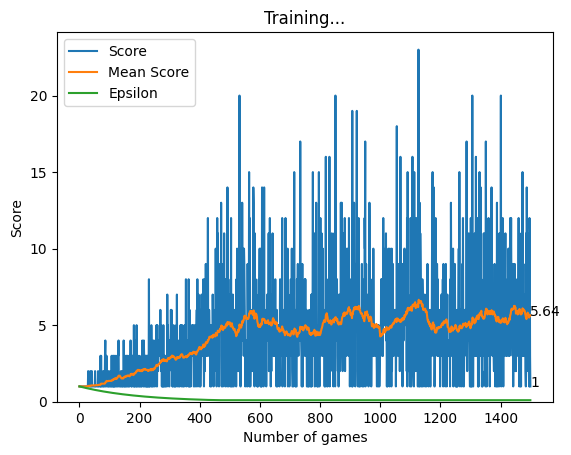

Episode: 1501/20000, Score: 1, Epsilon: 0.1
Episode: 1502/20000, Score: 1, Epsilon: 0.1
Episode: 1503/20000, Score: 14, Epsilon: 0.1
Episode: 1504/20000, Score: 1, Epsilon: 0.1
Episode: 1505/20000, Score: 1, Epsilon: 0.1
Episode: 1506/20000, Score: 5, Epsilon: 0.1


KeyboardInterrupt: 

In [5]:
train_rl_agent(20000, 500, game, dqnagent15n, state_function_15, n_games, total_score, plot_epsilons, plot_scores, plot_mean_scores)

In [6]:
load_dqnagent = dependencias.Agentes.DQNAgentN(
    gamma=0.99,
    epsilon=1.0,
    epsilon_min=0.025,          # Valor mínimo de epsilon ajustado a 0.025
    epsilon_decay=0.995,        # Decaimiento más lento
    learning_rate=0.0005,       # Tasa de aprendizaje ajustada
    input_dim=15,               # Actualizado según la nueva representación del estado
    hidden_dim=256,
    n_actions=4,      
    batch_size=128,             # Aumentado de 64 a 128
    mem_size=50000,             # Aumentado de 10000 a 50000
    target_update_freq=1000,    # Actualizado para coincidir con el scheduler
    checkpoint_dir='checkpoints',
    state_function=state_function_15
)

# Ruta al checkpoint que deseas cargar
checkpoint_path = 'checkpoints/dqn15N_ep1500_sc5.64.pth'

load_dqnagent.load_checkpoint(checkpoint_path)

Checkpoint loaded from Episode 1500 with Mean Score 5.64


c:\Users\Usuario\Documents\GitHub\practica_3_ALN\dependencias\Agentes\deep_q_agent_8_neurons.py:150: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(ch

In [7]:
load_dqnagent.epsilon = 0.0

In [11]:
game = dependencias.Snake_game((10, 10), 1, load_dqnagent)
game.state.reset()

In [12]:
game.play_with_pygame()